In [239]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

sns.set(style='white', font_scale=1.3)

In [257]:
def benchmark(heaps, N_list, Q):
    bench_result = dict()
    bench_result['N_list'] = N_list
    bench_result['Q'] = Q
    bench_result['latency'] = []
    
    for heap, options in heaps:
        for option_name, option in options:
            !./compile {heap} {option}
            values = []
            for N in tqdm(N_list, desc=option_name):
                res = !./{heap} {N} {Q}
                values += [float(res[1].split(': ')[1])]
            
            bench_result['latency'] += [(option_name, values)]
    
    return bench_result

In [270]:
cache_sizes = [32*1024, 512*1024, 16*1024*1024]
cache_labels = ['32Kb', '512Kb', '16Mb']

def plot_latency(bench_result, svg_file="latency.svg"):   
    plt.figure(figsize=(10, 8))
    
    for label, values in bench_result['latency']:
        plt.plot(bench_result['N_list'], values, label=label, lw=2)
        
    for cs, cl in zip(cache_sizes, cache_labels):
        plt.axvline(cs / 4, color='black', ls='--')
#         plt.text(cs / 4 * 1.1 , 25, cl)
        
    plt.title('Сравнение реализаций структуры данных Heap')
    plt.xlabel('Число элементов')
    plt.ylabel('query latency (ns)')
    plt.legend(loc=0)
    plt.xscale('log')
    plt.savefig(svg_file)
    plt.show()

def plot_latency_baseline(bench_result, svg_file="latency.svg"):   
    plt.figure(figsize=(10, 8))
    
    baseline_values = np.array(bench_result['latency'][0][1])
    for label, values in bench_result['latency'][1:]:
        plt.plot(bench_result['N_list'], baseline_values / values,
                 label=label, lw=2)
        
    for cs, cl in zip(cache_sizes, cache_labels):
        plt.axvline(cs / 4, color='black', ls='--')
#         plt.text(cs / 4 * 1.1 , 25, cl)
        
    plt.title('Сравнение реализаций структуры данных Heap')
    plt.xlabel('Число элементов')
    plt.ylabel('Ускорение')
    plt.legend(loc=0)
    plt.xscale('log')
    plt.savefig(svg_file)
    plt.show()

In [264]:
heaps = [
    ('stl_heap', [('stl', '')]),
    
    ('simple_heap', [
        ('prefetch (lvl 0)', '-DPREFETCH_LEVEL=0'),
        ('prefetch (lvl 1)', '-DPREFETCH_LEVEL=1'),
        ('prefetch (lvl 2)', '-DPREFETCH_LEVEL=2'),
        ('prefetch (lvl 3)', '-DPREFETCH_LEVEL=3'),
    ]),

#     'dheap',
#     'simd_heap'
]
N_list = np.logspace(2, 7, 10).astype(int).tolist()
Q = 10

bench_result = benchmark(heaps, N_list, Q)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 0):   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 1):   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 2):   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 3):   0%|          | 0/10 [00:00<?, ?it/s]

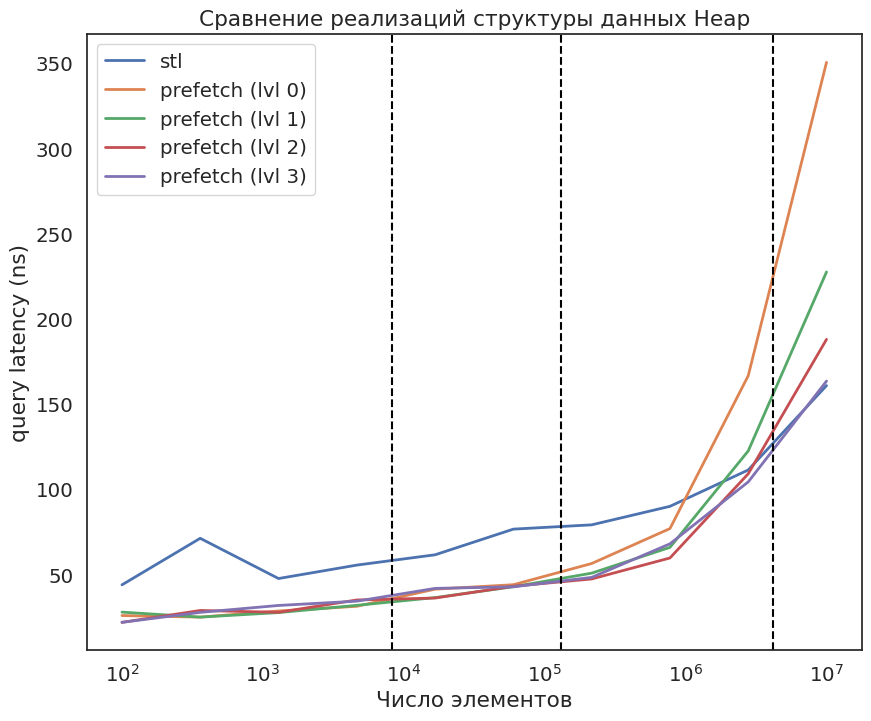

In [266]:
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 0):   0%|          | 0/10 [00:00<?, ?it/s]

prefetch (lvl 3):   0%|          | 0/10 [00:00<?, ?it/s]

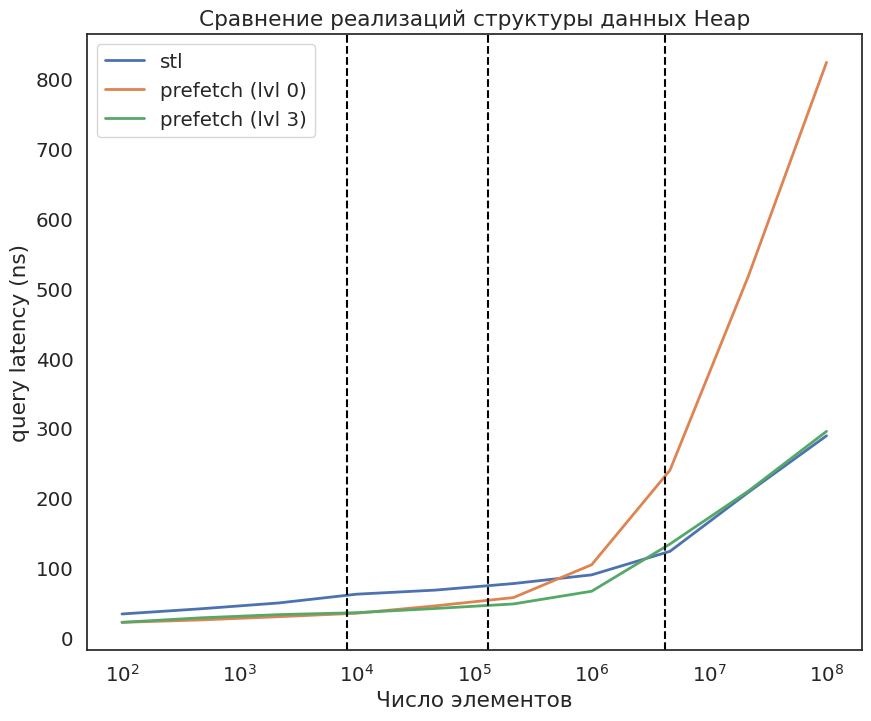

In [272]:
heaps = [
    ('stl_heap', [('stl', '')]),

    ('simple_heap', [('prefetch (lvl 3)', '-DPREFETCH_LEVEL=3'),]),
]
N_list = np.logspace(2, 8, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

4-heap:   0%|          | 0/10 [00:00<?, ?it/s]

8-heap:   0%|          | 0/10 [00:00<?, ?it/s]

16-heap:   0%|          | 0/10 [00:00<?, ?it/s]

32-heap:   0%|          | 0/10 [00:00<?, ?it/s]

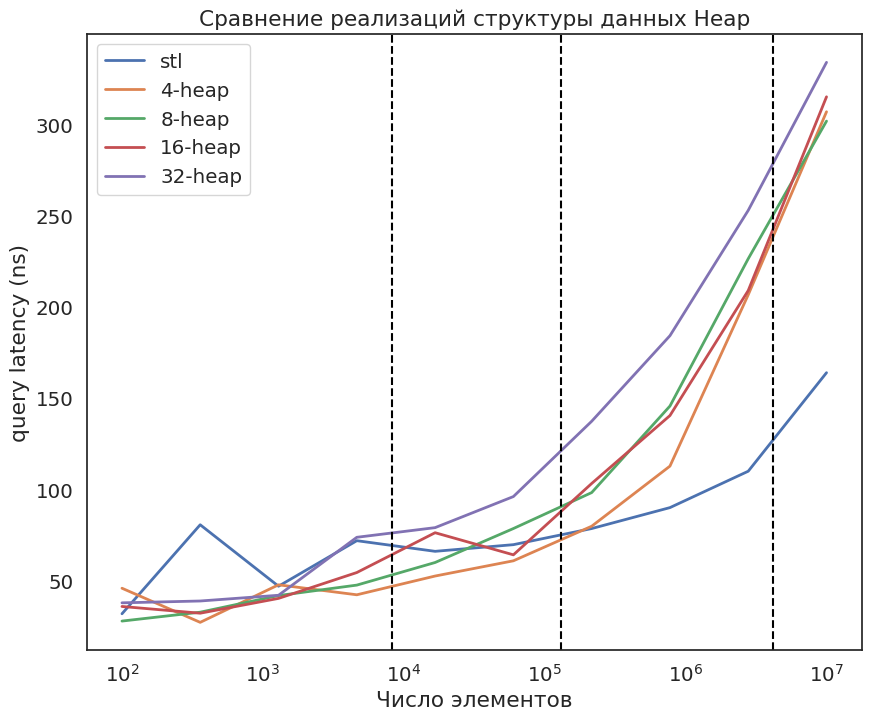

In [273]:
heaps = [
    ('stl_heap', [('stl', '')]),
    
    ('dheap', [
        ('4-heap', '-DBRANCHING_FACTOR=4'),
        ('8-heap', '-DBRANCHING_FACTOR=8'),
        ('16-heap', '-DBRANCHING_FACTOR=16'),
        ('32-heap', '-DBRANCHING_FACTOR=32')
    ]),
]
N_list = np.logspace(2, 7, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)

stl:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch cmov:   0%|          | 0/10 [00:00<?, ?it/s]

prefetch branch:   0%|          | 0/10 [00:00<?, ?it/s]

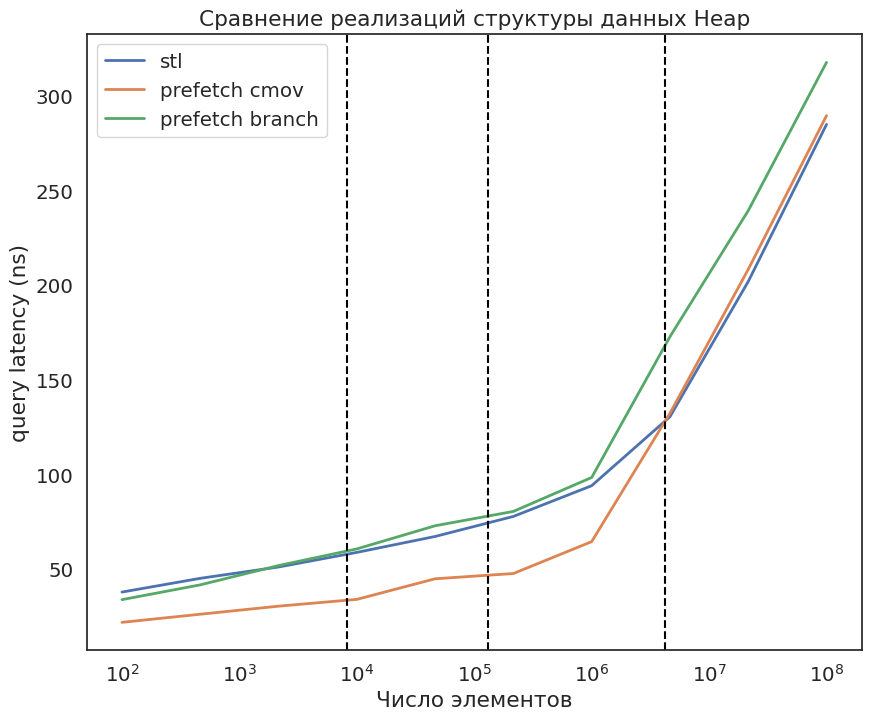

In [276]:
heaps = [
    ('stl_heap', [('stl', '')]),

    ('simple_heap', [
        ('prefetch cmov', '-DPREFETCH_LEVEL=3'),
        ('prefetch branch', '-DPREFETCH_LEVEL=3 -DWITH_BRANCH'),
    ]),
]
N_list = np.logspace(2, 8, 10).astype(int).tolist()
Q = 5

bench_result = benchmark(heaps, N_list, Q)
plot_latency(bench_result)